In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

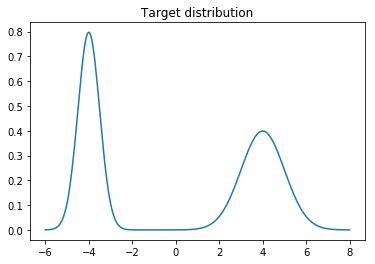

In [2]:
def target_dist(x):
    return (stats.norm.pdf(x, loc=-4, scale=0.5) +
            stats.norm.pdf(x, loc=4, scale=1))
    
x = np.linspace(-6,8, 300)
y = [y for y in target_dist(x)]

plt.plot(x,y)
plt.title("Target distribution")
plt.show()

In [3]:
def proposal_dist(x_0, e):
    return stats.norm.rvs(loc=x_0, scale=epsilon, size=1)

e = [0.5, 1, 2, 4]
results = {}
n = 1000

for epsilon in e:
    samples = []
    acceptance_rate_counter = 0
    x_0 = 0
    for t in range(n):
        x = proposal_dist(x_0, epsilon)
        a = target_dist(x) / target_dist(x_0)

        if np.random.uniform(0,1) < min(1, a):
            x_0 = x
            acceptance_rate_counter += 1
        else:
            x_0 = x_0
        samples.append(float(x_0))
    results[epsilon] = {}
    results[epsilon]['samples'] = samples
    results[epsilon]['AR'] = acceptance_rate_counter/n

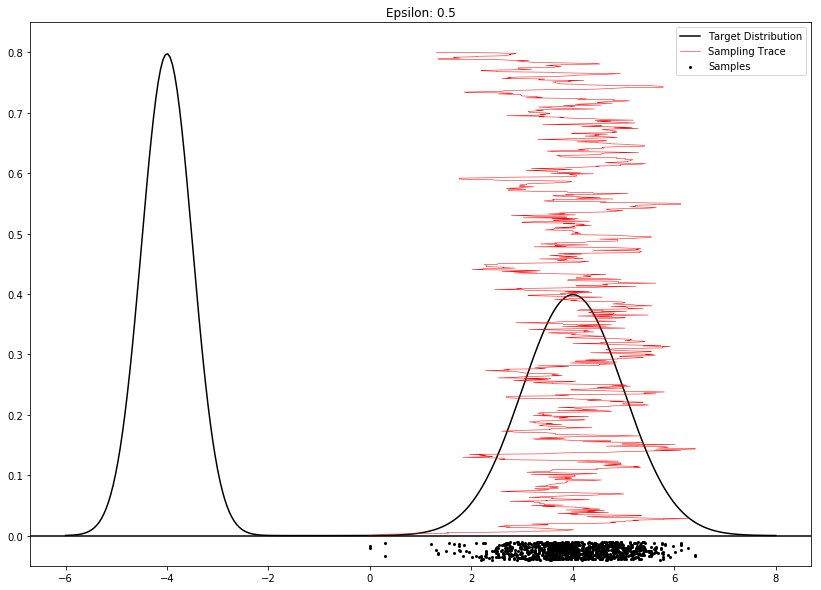

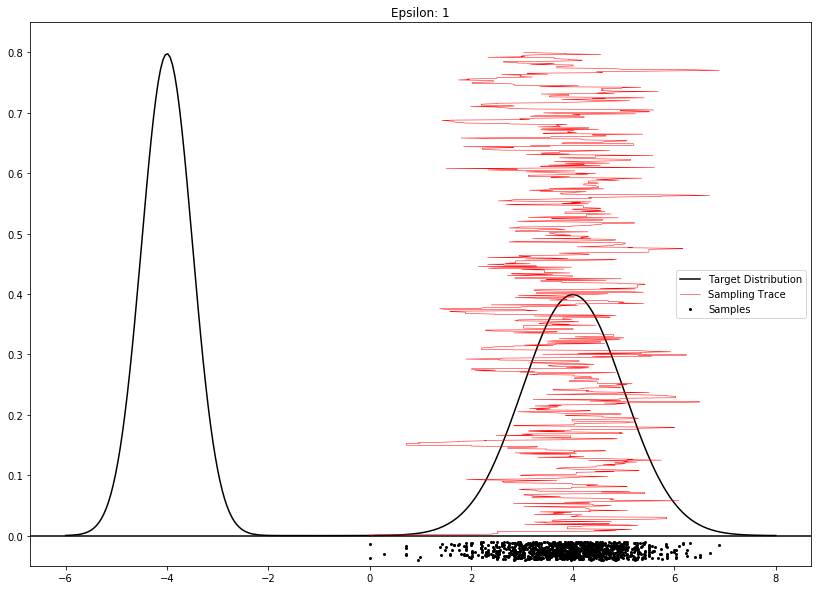

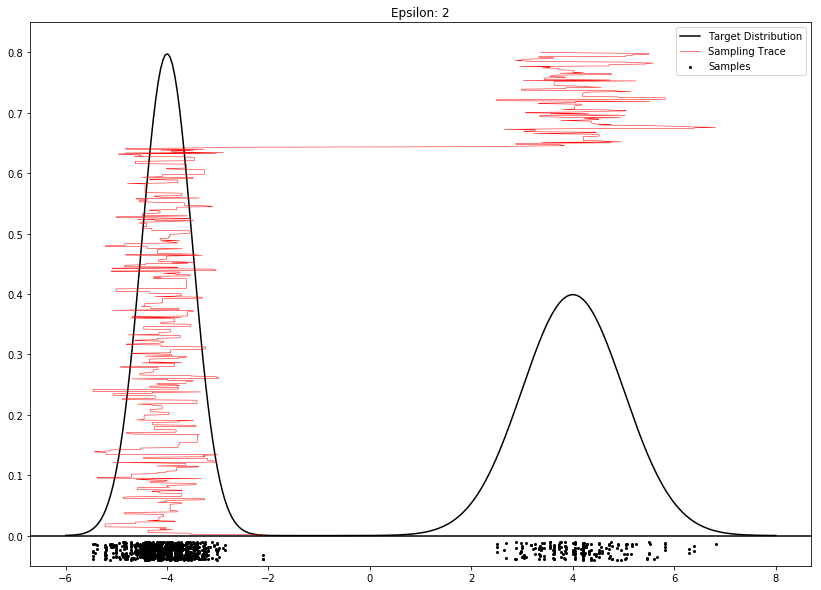

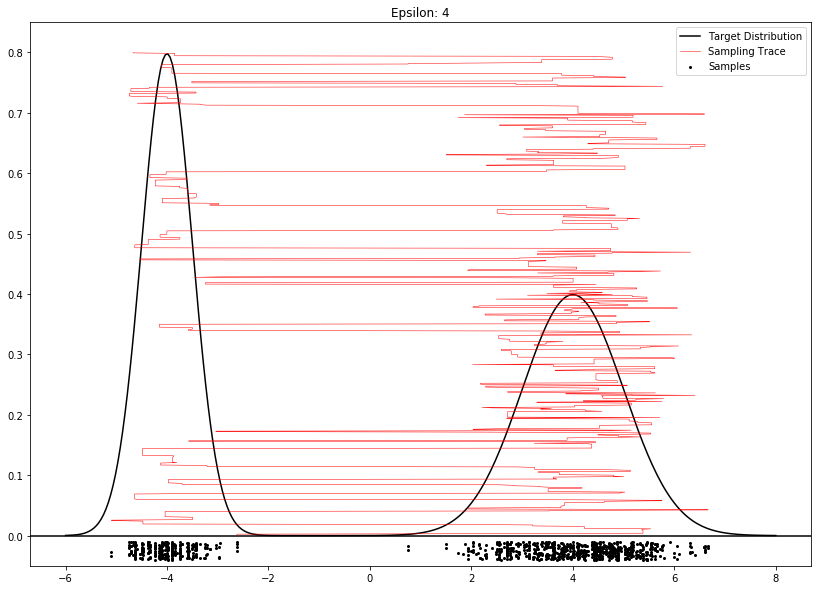

In [4]:
for epsilon in e:
    plt.figure(figsize=(14,10))
    samples = results[epsilon]['samples']
    
    x = np.linspace(-6,8, 300)
    y = [y for y in target_dist(x)]
    plt.plot(x,y, label="Target Distribution", color='k')
    
    #0 line
    plt.axhline(0, color='k')
    
    #samples
    y = np.random.uniform(-0.04, -0.01, size=len(samples))
    plt.scatter(samples,y, label="Samples", color='k', s=4)
    
    #trace
    y = np.linspace(0,0.8, len(samples))
    plt.plot(samples, y, label="Sampling Trace", color='r', linewidth=0.5)
    
    plt.ylim(-0.05, 0.85)
    plt.title("Epsilon: "+ str(epsilon))
    plt.legend()
    plt.show()